# Libraries

In [1863]:
import pandas as pd
import numpy as np
from scipy.stats import chi2_contingency
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
import category_encoders as ce
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import classification_report
from sklearn.base import BaseEstimator, TransformerMixin
from transformers import pipeline
from transformers import AutoTokenizer, AutoModelForSequenceClassification
import joblib

# Data Card

# Load Por Dataset

In [1864]:
por_df = pd.read_csv(r"C:\Users\tsarget\OneDrive\Desktop\student+performance\archive\student-por.csv" , sep = ";")
print("Shape: " , por_df.shape , "\n")
print(por_df.info())         # No nulls
por_df.head()

Shape:  (649, 33) 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 649 entries, 0 to 648
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      649 non-null    object
 1   sex         649 non-null    object
 2   age         649 non-null    int64 
 3   address     649 non-null    object
 4   famsize     649 non-null    object
 5   Pstatus     649 non-null    object
 6   Medu        649 non-null    int64 
 7   Fedu        649 non-null    int64 
 8   Mjob        649 non-null    object
 9   Fjob        649 non-null    object
 10  reason      649 non-null    object
 11  guardian    649 non-null    object
 12  traveltime  649 non-null    int64 
 13  studytime   649 non-null    int64 
 14  failures    649 non-null    int64 
 15  schoolsup   649 non-null    object
 16  famsup      649 non-null    object
 17  paid        649 non-null    object
 18  activities  649 non-null    object
 19  nursery     649 non-null    ob

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,4,0,11,11
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,2,9,11,11
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,6,12,13,12
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,0,14,14,14
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,0,11,13,13


In [1865]:
por_df.describe()    # All numeric columns data is consistent

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
count,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000
mean,16.744222,2.514638,2.306626,1.568567,1.930663,0.221880,3.930663,3.180277,3.184900,1.502311,2.280431,3.536210,3.659476,11.399076,11.570108,11.906009
std,1.218138,1.134552,1.099931,0.748660,0.829510,0.593235,0.955717,1.051093,1.175766,0.924834,1.284380,1.446259,4.640759,2.745265,2.913639,3.230656
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,16.000000,2.000000,1.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,2.000000,0.000000,10.000000,10.000000,10.000000
50%,17.000000,2.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,2.000000,11.000000,11.000000,12.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,6.000000,13.000000,13.000000,14.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,32.000000,19.000000,19.000000,19.000000


# Load Math Dataset

In [1866]:
math_df = pd.read_csv(r"C:\Users\tsarget\OneDrive\Desktop\student+performance\archive\student_math.csv")
print("Shape: " , math_df.shape , "\n")
print(math_df.info())         # No nulls
math_df.head()

Shape:  (395, 33) 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      395 non-null    object
 1   sex         395 non-null    object
 2   age         395 non-null    int64 
 3   address     395 non-null    object
 4   famsize     395 non-null    object
 5   Pstatus     395 non-null    object
 6   Medu        395 non-null    int64 
 7   Fedu        395 non-null    int64 
 8   Mjob        395 non-null    object
 9   Fjob        395 non-null    object
 10  reason      395 non-null    object
 11  guardian    395 non-null    object
 12  traveltime  395 non-null    int64 
 13  studytime   395 non-null    int64 
 14  failures    395 non-null    int64 
 15  schoolsup   395 non-null    object
 16  famsup      395 non-null    object
 17  paid        395 non-null    object
 18  activities  395 non-null    object
 19  nursery     395 non-null    ob

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


In [1867]:
math_df.describe()    # All numeric columns data is consistent

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
count,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000
mean,16.696203,2.749367,2.521519,1.448101,2.035443,0.334177,3.944304,3.235443,3.108861,1.481013,2.291139,3.554430,5.708861,10.908861,10.713924,10.415190
std,1.276043,1.094735,1.088201,0.697505,0.839240,0.743651,0.896659,0.998862,1.113278,0.890741,1.287897,1.390303,8.003096,3.319195,3.761505,4.581443
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,3.000000,0.000000,0.000000
25%,16.000000,2.000000,2.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,3.000000,0.000000,8.000000,9.000000,8.000000
50%,17.000000,3.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,4.000000,11.000000,11.000000,11.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,8.000000,13.000000,13.000000,14.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,75.000000,19.000000,19.000000,20.000000


# Preprocessing

### Check Dupliactes

In [1868]:
print("Duplicates in por data: ",por_df.duplicated().sum())
print("Duplicates in math data: ",math_df.duplicated().sum())

Duplicates in por data:  0
Duplicates in math data:  0


### Drop unnecessary columns

In [1869]:
por_df = por_df.drop(columns=['school'])
math_df = math_df.drop(columns=['school'])

### Add G3_risk column

In [1870]:
def risk_category(g3):
    if g3 < 10:
        return 'High Risk'
    elif 10 <= g3 <= 13:
        return 'Medium Risk'
    else:
        return 'Low Risk'

por_df['G3_risk'] = por_df['G3'].apply(risk_category)
math_df['G3_risk'] = math_df['G3'].apply(risk_category)

### Label Encoding

In [1871]:
# Mapping dictionaries
mappings = {
    "sex": {"M": 1, "F": 0},
    "address": {"U": 1, "R": 0},
    "famsize": {"LE3": 0, "GT3": 1},
    "Pstatus": {"T": 1, "A": 0},
    "schoolsup": {"yes": 1, "no": 0},
    "famsup": {"yes": 1, "no": 0},
    "paid": {"yes": 1, "no": 0},
    "activities": {"yes": 1, "no": 0},
    "nursery": {"yes": 1, "no": 0},
    "higher": {"yes": 1, "no": 0},
    "internet": {"yes": 1, "no": 0},
    "romantic": {"yes": 1, "no": 0},
    "G3_risk": {"Low Risk": 0, "Medium Risk": 1, "High Risk": 2}
}

# Apply encoding for por data set
for col, mapping in mappings.items():
    por_df[col] = por_df[col].map(mapping)
    

# Apply encoding for math data set
for col, mapping in mappings.items():
    math_df[col] = math_df[col].map(mapping)    

### One-hot Encoding

In [1872]:
# Columns to one-hot encode
onehot_cols = ['Mjob', 'Fjob', 'reason', 'guardian']

# One-hot encode and concat to the same DataFrame
por_df = pd.concat(
    [por_df, pd.get_dummies(por_df[onehot_cols], prefix=onehot_cols)], 
    axis=1
)

# Same for math dataset
math_df = pd.concat(
    [math_df, pd.get_dummies(math_df[onehot_cols], prefix=onehot_cols)], 
    axis=1
)

print("Portuguese df shape:", por_df.shape)
print("Math df shape:", math_df.shape)

Portuguese df shape: (649, 50)
Math df shape: (395, 50)


# Feature Engineering

## Create meaningful features maybe we need it

In [1873]:
por_df['G1_G2_avg'] = (por_df['G1'] + por_df['G2'])/2
math_df['G1_G2_avg'] = (math_df['G1'] + math_df['G2'])/2

## Correlation

In [1874]:
# Specific columns of interest
cols = [
    "age", "Medu", "Fedu", "traveltime", "studytime", "failures",
    "famrel", "freetime", "goout", "Dalc", "Walc",
    "health", "absences", "G1", "G2", "G1_G2_avg", "G3"
]

# Correlation matrix
corr_matrix = por_df[cols].corr()

# Print
corr_matrix

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G1_G2_avg,G3
age,1.000000,-0.107832,-0.121050,0.034490,-0.008415,0.319968,-0.020559,-0.004910,0.112805,0.134768,0.086357,-0.008750,0.149998,-0.174322,-0.107119,-0.144686,-0.106505
Medu,-0.107832,1.000000,0.647477,-0.265079,0.097006,-0.172210,0.024421,-0.019686,0.009536,-0.007018,-0.019766,0.004614,-0.008577,0.260472,0.264035,0.271627,0.240151
Fedu,-0.121050,0.647477,1.000000,-0.208288,0.050400,-0.165915,0.020256,0.006841,0.027690,0.000061,0.038445,0.044910,0.029859,0.217501,0.225139,0.229302,0.211800
traveltime,0.034490,-0.265079,-0.208288,1.000000,-0.063154,0.097730,-0.009521,0.000937,0.057454,0.092824,0.057007,-0.048261,-0.008149,-0.154120,-0.154489,-0.159793,-0.127173
studytime,-0.008415,0.097006,0.050400,-0.063154,1.000000,-0.147441,-0.004127,-0.068829,-0.075442,-0.137585,-0.214925,-0.056433,-0.118389,0.260875,0.240498,0.259280,0.249789
failures,0.319968,-0.172210,-0.165915,0.097730,-0.147441,1.000000,-0.062645,0.108995,0.045078,0.105949,0.082266,0.035588,0.122779,-0.384210,-0.385782,-0.398701,-0.393316
famrel,-0.020559,0.024421,0.020256,-0.009521,-0.004127,-0.062645,1.000000,0.129216,0.089707,-0.075767,-0.093511,0.109559,-0.089534,0.048795,0.089588,0.072278,0.063361
freetime,-0.004910,-0.019686,0.006841,0.000937,-0.068829,0.108995,0.129216,1.000000,0.346352,0.109904,0.120244,0.084526,-0.018716,-0.094497,-0.106678,-0.104349,-0.122705
goout,0.112805,0.009536,0.027690,0.057454,-0.075442,0.045078,0.089707,0.346352,1.000000,0.245126,0.388680,-0.015741,0.085374,-0.074053,-0.079469,-0.079572,-0.087641
Dalc,0.134768,-0.007018,0.000061,0.092824,-0.137585,0.105949,-0.075767,0.109904,0.245126,1.000000,0.616561,0.059067,0.172952,-0.195171,-0.189480,-0.199072,-0.204719


## Chi ²

###### Math Dataset

In [1875]:
# Drop numeric/target features
exclude_cols = ['age', 'failures', 'absences', 'G1', 'G2', 'G3', 'G1_G2_avg', 'G3_risk']
cols = [c for c in math_df.columns if c not in exclude_cols]

results = []
for col in cols:
    table = pd.crosstab(math_df[col], math_df['G3_risk'])
    chi2, p, dof, _ = chi2_contingency(table)
    if p < 0.05:  # keep only significant
        results.append((col, chi2, p))

# Collect into DataFrame
chi2_df = pd.DataFrame(results, columns=['Feature', 'Chi2', 'p-value'])

print("Features significantly related to G3_risk:")
chi2_df

Features significantly related to G3_risk:


,Feature,Chi2,p-value
0,address,6.657565,0.035837
1,Medu,33.831965,0.000044
2,Mjob,15.765301,0.045865
3,studytime,13.131051,0.041001
4,schoolsup,12.115411,0.002340
5,higher,12.155626,0.002293
6,goout,17.474618,0.025529
7,Dalc,17.430046,0.025930
8,Mjob_health,7.284744,0.026190
9,Fjob_teacher,11.683189,0.002904


###### Por Dataset

In [1876]:
# Drop numeric/target features
exclude_cols = ['age', 'failures', 'absences', 'G1', 'G2', 'G3', 'G1_G2_avg', 'G3_risk']
cols = [c for c in por_df.columns if c not in exclude_cols]

results = []
for col in cols:
    table = pd.crosstab(por_df[col], por_df['G3_risk'])
    chi2, p, dof, _ = chi2_contingency(table)
    if p < 0.05:  # keep only significant
        results.append((col, chi2, p))

# Collect into DataFrame
chi2_df = pd.DataFrame(results, columns=['Feature', 'Chi2', 'p-value'])

print("Features significantly related to G3_risk:")
chi2_df

Features significantly related to G3_risk:


,Feature,Chi2,p-value
0,sex,8.200132,1.657158e-02
1,address,14.232568,8.117778e-04
2,Medu,47.984697,9.946303e-08
3,Fedu,34.950977,2.729387e-05
4,Mjob,31.783493,1.018346e-04
5,reason,29.874201,4.153315e-05
6,studytime,39.405307,5.960470e-07
7,schoolsup,20.414454,3.690265e-05
8,paid,6.299846,4.285542e-02
9,higher,73.778138,9.534124e-17


## Data Splitting

In [1877]:
features = [c for c in math_df.columns if c not in [target, 'G3']]

target = "G3_risk"

freq_encode_cols = ['Mjob', 'Fjob', 'reason', 'guardian']     # already scaled when make freq encoding

scaling_features = ['age', 'Medu', 'Fedu', 'traveltime', 'studytime', 'failures',
       'famrel', 'freetime', 'goout', 'Dalc', 'Walc',
       'health', 'absences', 'G1', 'G2','G1_G2_avg']

###### Math Dataset

In [1878]:
X_math = math_df[features]
y_math = math_df[target]

x_math_train, x_math_test, y_math_train, y_math_test = train_test_split(
    X_math, y_math, test_size=0.2, random_state=42, stratify=y_math
)

###### Por Dataset

In [1879]:
X_por = por_df[features]
y_por = por_df[target]

x_por_train, x_por_test, y_por_train, y_por_test = train_test_split(
    X_por, y_por, test_size=0.2, random_state=42, stratify=y_por
)

# Model Selection

##### Define Features for each Model type

In [1880]:
tree_features = ['sex', 'address', 'Medu', 'Fedu', 'Mjob',
       'reason', 'studytime',
       'schoolsup', 'paid', 'higher',
       'internet', 'famrel', 'freetime', 'goout', 'Dalc', 'Walc',
       'health', 'G1', 'G2', 'Mjob_at_home', 'Mjob_health',
       'Mjob_teacher',
       'Fjob_teacher',
       'reason_course', 'reason_other', 'reason_reputation',
       'G1_G2_avg']


linear_features = ['age','Medu', 'Fedu', 'Mjob',
       'Fjob', 'reason', 'guardian',
       'G1', 'G2','G1_G2_avg']

###### Math Dataset

In [1881]:
# Frequency encoding
for col in freq_encode_cols:
    freq = x_math_train[col].value_counts() / len(x_math_train)
    x_math_train[col] = x_math_train[col].map(freq)
    x_math_test[col] = x_math_test[col].map(freq)  # Use train freq for test


# MinMax scaling
scaler = MinMaxScaler()
x_math_train[scaling_features] = scaler.fit_transform(x_math_train[scaling_features])
x_math_test[scaling_features] = scaler.transform(x_math_test[scaling_features])


# Prepare X
X_train_tree = x_math_train[tree_features]
X_test_tree = x_math_test[tree_features]

X_train_linear = x_math_train[linear_features]
X_test_linear = x_math_test[linear_features]

# Tree-based models
dt_model = DecisionTreeClassifier(random_state=42)
rf_model = RandomForestClassifier(random_state=42)

dt_model.fit(X_train_tree, y_math_train)
rf_model.fit(X_train_tree, y_math_train)

y_pred_dt = dt_model.predict(X_test_tree)
y_pred_rf = rf_model.predict(X_test_tree)

print("Decision Tree Accuracy:", accuracy_score(y_math_test, y_pred_dt))
print("Random Forest Accuracy:", accuracy_score(y_math_test, y_pred_rf))

# Linear models
lr_model = LogisticRegression(max_iter=1000, random_state=42)
svm_model = SVC(kernel='linear', probability=True, random_state=42)

lr_model.fit(X_train_linear, y_math_train)
svm_model.fit(X_train_linear, y_math_train)

y_pred_lr = lr_model.predict(X_test_linear)
y_pred_svm = svm_model.predict(X_test_linear)

print("Logistic Regression Accuracy:", accuracy_score(y_math_test, y_pred_lr))
print("SVM Accuracy:", accuracy_score(y_math_test, y_pred_svm))

Decision Tree Accuracy: 0.8987341772151899
Random Forest Accuracy: 0.8481012658227848
Logistic Regression Accuracy: 0.8354430379746836
SVM Accuracy: 0.8607594936708861


###### Por Dataset

In [1882]:
# Frequency encoding
for col in freq_encode_cols:
    freq = x_por_train[col].value_counts() / len(x_por_train)
    x_por_train[col] = x_por_train[col].map(freq)
    x_por_test[col] = x_por_test[col].map(freq)  # Use train freq for test
    

# MinMax scaling
scaler = MinMaxScaler()
x_por_train[scaling_features] = scaler.fit_transform(x_por_train[scaling_features])
x_por_test[scaling_features] = scaler.transform(x_por_test[scaling_features])


# Prepare X
# Features to exclude from tree-based models
exclude_features = ['internet', 'famrel', 'freetime', 'goout', 'Dalc', 'Walc']

# Filter tree_features
tree_features_filtered = [f for f in tree_features if f not in exclude_features]

X_train_tree = x_por_train[tree_features_filtered]
X_test_tree = x_por_test[tree_features_filtered]

X_train_linear = x_por_train[linear_features]
X_test_linear = x_por_test[linear_features]

# Tree-based models
dt_model = DecisionTreeClassifier(random_state=42)
rf_model = RandomForestClassifier(random_state=42)

dt_model.fit(X_train_tree, y_por_train)
rf_model.fit(X_train_tree, y_por_train)

y_pred_dt = dt_model.predict(X_test_tree)
y_pred_rf = rf_model.predict(X_test_tree)

print("Decision Tree Accuracy:", accuracy_score(y_por_test, y_pred_dt))
print("Random Forest Accuracy:", accuracy_score(y_por_test, y_pred_rf))

# Linear models
lr_model = LogisticRegression(max_iter=1000, random_state=42)
svm_model = SVC(kernel='linear', probability=True, random_state=42)

lr_model.fit(X_train_linear, y_por_train)
svm_model.fit(X_train_linear, y_por_train)

y_pred_lr = lr_model.predict(X_test_linear)
y_pred_svm = svm_model.predict(X_test_linear)

print("Logistic Regression Accuracy:", accuracy_score(y_por_test, y_pred_lr))
print("SVM Accuracy:", accuracy_score(y_por_test, y_pred_svm))

Decision Tree Accuracy: 0.7692307692307693
Random Forest Accuracy: 0.823076923076923
Logistic Regression Accuracy: 0.7923076923076923
SVM Accuracy: 0.7846153846153846


# Final Model for each Dataset

### Manual Frequency Encoder

In [1883]:
class ManualFreqEncoder(BaseEstimator, TransformerMixin):
    def __init__(self, cols):
        self.cols = cols
        self.freq_maps = {}
        
    def fit(self, X, y=None):
        for col in self.cols:
            self.freq_maps[col] = X[col].value_counts() / len(X)
        return self
    
    def transform(self, X):
        X = X.copy()
        for col in self.cols:
            X[col] = X[col].map(self.freq_maps[col]).fillna(0)  # unseen -> 0
        return X

###### Math Dataset

Pipeline saved to dt_pipeline_math.pkl
Decision Tree Accuracy: 0.8987341772151899

Classification Report:

              precision    recall  f1-score   support

           0       1.00      0.90      0.95        20
           1       0.86      0.91      0.88        33
           2       0.88      0.88      0.88        26

    accuracy                           0.90        79
   macro avg       0.91      0.90      0.90        79
weighted avg       0.90      0.90      0.90        79



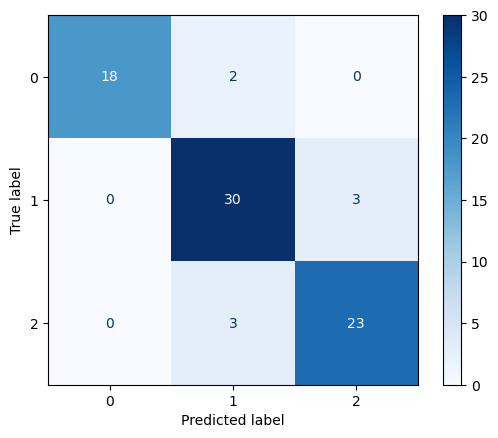

In [1884]:
freq_encode_cols = ['Mjob', 'reason']
scaling_features = ['Medu', 'Fedu','studytime',
       'famrel', 'freetime', 'goout', 'Dalc', 'Walc',
       'health', 'G1', 'G2','G1_G2_avg']


X_math = math_df[tree_features]
y_math = math_df[target]


# Train-test split
# ===============================
x_math_train, x_math_test, y_math_train, y_math_test = train_test_split(
    X_math, y_math, test_size=0.2, random_state=42, stratify=y_math
)


# Preprocessor
# ===============================
preprocessor = ColumnTransformer(
    transformers=[
        ('freq', ManualFreqEncoder(cols=freq_encode_cols), freq_encode_cols),
        ('scale', MinMaxScaler(), scaling_features)
    ],
    remainder='passthrough'
)


# Pipeline
# ===============================
pipeline = Pipeline([
    ('preprocessing', preprocessor),
    ('dt', DecisionTreeClassifier(random_state=42))
])

# Fit pipeline
# ===============================
pipeline.fit(x_math_train, y_math_train)
# Save pipeline
# ===============================
joblib.dump(pipeline, 'dt_pipeline_math.pkl')
print("Pipeline saved to dt_pipeline_math.pkl")

# Predict & evaluate
# ===============================
y_pred = pipeline.predict(x_math_test)
print("Decision Tree Accuracy:", accuracy_score(y_math_test, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_math_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=pipeline.classes_)
disp.plot(cmap='Blues')

# Classification report
print("\nClassification Report:\n")
print(classification_report(y_math_test, y_pred))


###### Por Dataset

Pipeline saved to rf_pipeline_por.pkl
Random Forest Accuracy: 0.823076923076923

Classification Report:

              precision    recall  f1-score   support

           0       0.85      0.74      0.79        39
           1       0.82      0.87      0.84        71
           2       0.80      0.80      0.80        20

    accuracy                           0.82       130
   macro avg       0.82      0.81      0.81       130
weighted avg       0.82      0.82      0.82       130



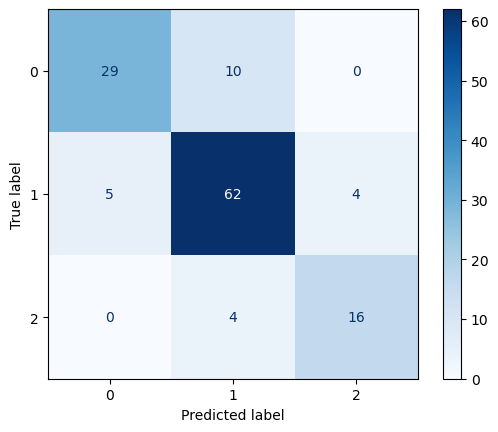

In [1885]:
tree_features = ['sex', 'address', 'Medu', 'Fedu', 'Mjob',
       'reason', 'studytime',
       'schoolsup', 'paid', 'higher',
       'health', 'G1', 'G2', 'Mjob_at_home', 'Mjob_health',
       'Mjob_teacher',
       'Fjob_teacher',
       'G1_G2_avg']

freq_encode_cols = ['Mjob','reason']

scaling_features = ['Medu', 'Fedu','studytime',
       'health', 'G1', 'G2','G1_G2_avg' ]


X_por = por_df[tree_features]
y_por = por_df[target]


# Train-test split
# ===============================
x_por_train, x_por_test, y_por_train, y_por_test = train_test_split(
    X_por, y_por, test_size=0.2, random_state=42, stratify=y_por
)


# Preprocessor
# ===============================
preprocessor = ColumnTransformer(
    transformers=[
        ('freq', ManualFreqEncoder(cols=freq_encode_cols), freq_encode_cols),
        ('scale', MinMaxScaler(), scaling_features)
    ],
    remainder='passthrough'
)


# Pipeline
# ===============================
pipeline = Pipeline([
    ('preprocessing', preprocessor),
    ('rf', RandomForestClassifier(random_state=42))
])

# Fit pipeline
# ===============================
pipeline.fit(x_por_train, y_por_train)
# Save pipeline
# ===============================
joblib.dump(pipeline, 'rf_pipeline_por.pkl')
print("Pipeline saved to rf_pipeline_por.pkl")

# Predict & evaluate
# ===============================
y_pred = pipeline.predict(x_por_test)
print("Random Forest Accuracy:", accuracy_score(y_por_test, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_por_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=pipeline.classes_)
disp.plot(cmap='Blues')

# Classification report
print("\nClassification Report:\n")
print(classification_report(y_por_test, y_pred))

# Nlp Model for Sentiment Analysis

In [ ]:
model_name = "cardiffnlp/twitter-roberta-base-sentiment-latest"

# Download and cache locally
tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModelForSequenceClassification.from_pretrained(model_name)

# Save to local folder
model.save_pretrained("./sentiment_model")
tokenizer.save_pretrained("./sentiment_model")